# Supervised ML & Sentiment Analysis
## Destekli Öğrenme
Destekli makine öğrenmesinde elimizde bir input vardır. Bu X değeri modele girer ve Y_hat(tahmin) değerini hesaplar. Gerçek (Y) değeri ve tahin edilen (Y_hat) değerini karşılaştırmak için bir Cost fonksiyonu kullanırız. Bu cost fonksiyonu bize tahmin edilenin ne kadar yanlış olduğunu döndürür. Bu fonksiyona göre parametreleri(weight and bias) güncelleriz. Bu sayede daha doğru Y_Hat değerleri üretiriz. 
## Sentiment Analysis
Metinlerde sentiment analizi yapmak için benzer bir süreç kullanırız. Burada metin alınır ve bu metin özellik vektörlerine çevirilir. Bu vektör modele gönderilir ve metinin positif mi ne negatif mi olduğu yönünde bir çıktı üretir. Elimizdeki gerçek etikete göre logistic regression modelimizi eğititiriz ve bu modeli metinlerin duygu durumlarını tespit etmek için kullanırız. 

### Özellik Vektörü Oluşturma
Metinler: 
[metin_1,metin_2,...metin_m] -> I love this movie, ..., ..., I hated the movie  

V(Vocabulary) = [I,love, this, movie, ..., hated, the]  
#### Özellik Çıkarma 
Aşağıdaki yorum için özellik vektörü çıkaralım. Burada elimizdeki yorumda vocabularyde olan kelimeler için 1 olmayanlar için 0 koyarak özellik vektörü çıkartabiliriz.   
I love this movie  
[I love this movie, ..., I hated the movie]   
[1, 1, 1, 1, ..., 0, 0, 0, 0]  
Bu gösterime sparse gösterim denir. Bu yöntem çok sağlıklı değildir. Burada vektörün boyu vocabularyde bulunan kelime sayısı kadar olacaktır. Her yorum için çok fazla 0 değer olacaktır.  
[x0,x1,x2,...,xn]  -> Eğitim ve tahmin uzun sürecek  
n = V  

### Pozitif ve Negatif Sayıları 
Corpus: Yazılmış metinler topluluğuna denir. Örneğin IMDB film yorumları bizim corpusumuz olabilir. Yada bir yazarın tüm kitapları bizim corpusumuz olabilir.  

Corpus->  
I love this movie [P]  
I like the movie [P]  
I bored the movie [N]    
I hated the movie [N]    
Yukarıda metinde pozitif ve negatif metinlerde geçen kelimlerin kaç kere geçtiğini yazarak pos freq ve neg freq oluşturabiliriz. 
Bundan yararlanarak örneğin. "I love this movie" için pozitif ve negatif değeri hesaplayabiliriz. Buradan elde ettiğimiz değerler bizim feature vektörümüz olur.   
I love this movie -> Xm = [1,sum(freqs(w,1),sum(freqs(w,0)]    
sum(freqs(w,1)) -> 4+1+1+4 : 10  
sum(freqs(w,0)) -> 4+0+0+4 : 8  
Bu metin artık Xm = [1,10,8] 3 boyutlu vektörü ile gösterilebilir. 1 bias, 10 positif özellikler, 8 negatif özellikler.   

### Preprocessing
Metinde buluanan model için pek fazla anlam ifade etmeyecek kelimelerin, noktalama işaretlerinin düzenlenerek kaldırılması gerekir. 
* Stopwords ve punctuations  
Stopwordler neredeyse tüm metinlerde geçen ve metni ayırma noktasında herhangi bir anlam ifade etmeyen kelimlerdir. Bunlar ingilizce için and, is, are, at, has, for, a gibi kelimelerdir.  
Puctuationlarda(Noktalama işaretleri) metinden özellik çıkarmada işimize yaramayacaklardır. [, . : ! " ']  
* URLs  
Metinde buluanan URL ler sentiment analizinde herhangi bir anlam ifade etmeyecektir. 
* Stemming ve lowercasing  
Herhangi bir kelimenin eklerini kaldırıp sadece kökünü almak için kullanılır.  
Örneğin: going -> go (-ing ekini kaldırdık) yada  
loving , loved, love kelimeleri için kelimenin kökü "lov" olacaktır. Burada lov kelimesi anlamlı değildir ancak stemming ile kelimenin kökü bulunurken anlam aranmamaktadır.
Aynı zamanda tüm kelimeler küçük harfe çevirilir. Love, LOVE, love -> love olacaktır.  



In [42]:
import nltk # Python NLP kütüphanesi
from nltk.corpus import twitter_samples # NLTK kütüphanesinde bulunan twitter veriseti
import matplotlib.pyplot as plt
import random 
import numpy as np

Aşağıdaki verisetinde positif ve negatif tweetler bulunuyor. Veri setinde 5000 posizif 5000 negatif tweet bulunmaktadır. Elimizdeki veriler dengeli bir şekilde dağılmış olması model oluşturmada işimize yarayacaktır. Ancak gerçek dünyada dağılım bu şekilde olmayabilir. 

In [5]:
# twitter verisetini indirmek için
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\bagat\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

Metinleri indirmek için string() metodunu kullanabiliriz. 

In [7]:
all_positive_tweet = twitter_samples.strings("positive_tweets.json")
all_negative_tweet = twitter_samples.strings("negative_tweets.json")

Pozitif ve negatif tweetler örnek sayısı ve içerikleri hakkında bilgi edinmek için aşağıdaki gibi bilgileri yazdıralım. 

In [10]:
print(f"Pozitif tweet sayısı: {len(all_positive_tweet)}")
print(f"Negatif tweet sayısı: {len(all_negative_tweet)}")

print(f"\nPozitif tweet verisinin tipi: {type(all_positive_tweet)}")
print(f"Her bir tweet verisinin tipi: {type(all_positive_tweet[0])}")

Pozitif tweet sayısı: 5000
Negatif tweet sayısı: 5000

Pozitif tweet verisinin tipi: <class 'list'>
Her bir tweet verisinin tipi: <class 'str'>


Veriler liste halinde tutuluyor. Her bir tweet string olarak tutuluyor. Matplotlib ile veriyi görselleştirebiliriz. 

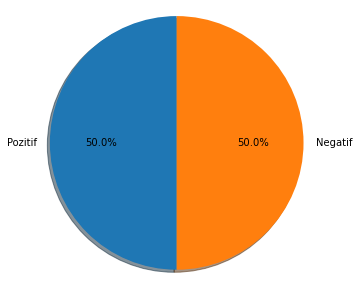

In [12]:
fig = plt.figure(figsize=(5,5))
labels = ["Pozitif", "Negatif"]
sizes = [len(all_positive_tweet),len(all_negative_tweet)]
plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90)
plt.axis("equal")
plt.show()

### Raw text'e bakalım
Herhangi bir işlem yapmadan önce elimizdeki verilere bakıp hangi işlemleri yapacağımızı planlamamız gerekir.  
Aşağıdaki random olarak pos. ve neg. tweetleri yazdıralım.

In [18]:
print(f"Pos : {all_positive_tweet[random.randint(0,5000)]}")
print(f"Neg : {all_negative_tweet[random.randint(0,5000)]}")

Pos : @FindBenNeedham it's my birthday today so for my birthday wish I hope there's good news about Ben soon :-)
Neg : sehun seems so skinny these days :(((


### Preprocess adımına geçelim 
Data processing işlemi ML projelerinde en önemli adımdır. Verinin temizlenmesi, modele uygun formata getirilmesi adımları oldukça kritiktir. NLP'de temel preprocessing adımları aşağıdaki gibidir.   
* Tokenizing the string (Tokenlere çevirme)
* Lowercasing (tüm kelimeleri küçük harflere çevirme)
* Removing stopwords and punctuations (Stopwordslerin ve noktalama işaretlerinin kaldırılması)
* Stemming (Kelimenin kökünün bulunması)

In [19]:
tweet = all_positive_tweet[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [20]:
nltk.download("stopwords") #stopwordsleri indirelim.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bagat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
import re # regular expression işlemleri için
import string # string işlemleri için

from nltk.corpus import stopwords #stopwords verileri
from nltk.stem import PorterStemmer # stemming için
from nltk.tokenize import TweetTokenizer # stringi tokenize etmek için

## Hyperlink ve Twitter İşaretlerinin Kaldırılması 
Twitterda çok fazla kullanılan hashtag, retweet işareti ve hyperlinkleri kaldırabiliriz. Bunun için "re" kütühanesini kullanacağız. Eşleşmeleri sub() metodu ile kaldıracağız. 

In [30]:
print("Before Preprocessing\n"+tweet)

# eskiden kullanılan "RT" tagını kaldıralım 
tweet2 = re.sub(r"^RT[\s]+",'',tweet)

# hyperlinkleri kaldıralım 
tweet2 = re.sub("https?://[^\s\n\r]+","",tweet2)

# hashtagleri kaldıralım 
tweet2 = re.sub(r"#","",tweet2)

print("\nAfter Preprocessing\n"+tweet2)


Before Preprocessing
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

After Preprocessing
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


## Tokenize the String
Tokenize işlemi metnin kelimelere ayrılması işlemidir. Bu adımda hem kelimleri ayırıp hemde bunları küçük harflere çevireceğiz. 

In [34]:
print("Before Tokenization\n"+tweet2)

# tokenizer classında obje oluşturalım
tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True) 

tweet_tokens = tokenizer.tokenize(tweet2)

print("\nAfter Tokenization")
print(tweet_tokens)


Before Tokenization
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

After Tokenization
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


## Stopwordslerin ve noktalama işaretlerinin kaldırılması 
Bu adımda stopwordsleri ve noktalama işaretlerini nltk kütüphanesi kullanarak kaldıracağız. İngilizce için kullanılan stop wordsleri almak için "english" değerini göndereceğiz. 

In [35]:
stopwords_english = stopwords.words("english")

print("Stop words \n")
print(stopwords_english)

print("\nPucntiuation\n")
print(string.punctuation)

Stop words 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

Yukarıda gördüğümüz stopwordsler bazı durumlarda işimize yarayabilir. Bu durumlarda stopwords listesini düzenlememiz gerekebilir ama bu örnekte hepsini kullanacağız.  


In [36]:
print(tweet_tokens)

tweets_clean = []

for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
        tweets_clean.append(word)
print("Stopwordsler ve noktalama işaretleri kaldırılmış: \n")
print(tweets_clean)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
Stopwordsler ve noktalama işaretleri kaldırılmış: 

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


## Stemming 
Stemming kelimenin kökünün bulunması için kullanılır. Bu vocabulary boyutunu azaltmamıza yarar.  
Bazı durumlarda stemming işlemi kelimenin kökünü tam olarak bulamabilir. Buna örnek olarak
* happy 
* happiness 
* happier  
verilebilir. Burada kök happ olacaktır. Bu da yanlış sonuçlar verebilir. 


In [37]:
print(tweets_clean)

stemmer = PorterStemmer()

tweets_stem = []
for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)
    
print("stemmed words: ")
print(tweets_stem)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
stemmed words: 
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


Bir tweet için preprocess kısmını tamamladık. Bunu tüm tweetler için yapamamız gerekiyor. Bunun için bir yukarıda yaptığımız işlemler ile bir fonksiyon yazalım. 

In [38]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words("english")
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean

### Genel Bakış 
Text -> Preprocess -> Feature Extraction   
Text -> Preprocess -> [1,10,8] (1 bias, 10 positif değer, 8 negatif için aldığı değer)  
[1 X1 X2] -> [1,10,8]   
Yukarıda gibi tüm kelimeler için bu işlemi yapıp (m,3) bir matrix elde edebiliriz.  

Sentiment analizinde kullanmak için bir kelimenin pozitif ve negatif etiketli cümlelerde kaç kere geçtiğini bulabiliriz. 

In [40]:
# tüm tweetleri birleştirelim 
tweets = all_positive_tweet + all_negative_tweet

print("Toplam tweet sayısı: "+ str(len(tweets)))

Toplam tweet sayısı: 10000


Tweetlerin sentimenlerine göre label adında bir array oluşturalım. Bu arrayde ilk 5000 veri 1 olarak son 5000 veri ise 0 olarak etiketlenecek. 
* np.ones() - 1 lerden array oluştur
* np.zeros() - 0 lardan array oluştur
* np.append() - 2 arrayi birleştir

In [43]:
labels = np.append(np.ones(len(all_positive_tweet)),np.zeros(len(all_negative_tweet)))

## Kelime frekans sözlüğü (word freq dict)
Bunun için build_freq adında bir fonksiyon oluşturalım.  

In [44]:
def build_freqs(tweets,ys): 
    # tweets: list of tweet 
    # ys: mx1 label arrayi 
    
    # numpy arrayini liste çevirelim 
    yslist = np.squeeze(ys).tolist()
    
    # boş bir dict oluşturalım
    freqs = {}
    # (word,1) : 25 -> pozitif cümlelerde geçiyor 
    # (word,0) : 3 -> negatif cümlelerde geçiyor
    for y,tweet in zip(yslist,tweets):
        for word in process_tweet(tweet):
            pair = (word,y)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair] = 1
    return freqs
    
    

Yukarıdaki freqs sözlüğü içerisinde her key 2 elamanlı bir tuple içeriyor. (word,y) word preprocess işlemi yapılmış kelime ve y bu kelimenin ait olduğu cümlenin sentimenti 1 veya 0 değeri alıyor.  

In [45]:
freqs = build_freqs(tweets,labels)
print("len(freq) : "+ str(len(freqs)))

len(freq) : 13171


In [55]:
print(list(freqs.items())[:10]) #bir kısmını gösterelim

[(('followfriday', 1.0), 25), (('top', 1.0), 32), (('engag', 1.0), 7), (('member', 1.0), 16), (('commun', 1.0), 33), (('week', 1.0), 83), ((':)', 1.0), 3691), (('hey', 1.0), 77), (('jame', 1.0), 7), (('odd', 1.0), 2)]


# Kelimeleri inceleyelim 
Yukarıdaki gösterim pek anlaşılır görünmüyor. Bunun için aşağıdaki gibi her kelimenin pozitif ve negatif cümlelerde ne kadar geçtiğini hesaplayalım. 

In [58]:
# belli başlı kelimeleri seçelim 
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
data = []
for word in keys: 
    pos = 0
    neg = 0
    
    if (word,1) in freqs:
        pos = freqs[(word,1)]
        
    if (word,0) in freqs:
        neg = freqs[(word,0)]
    
    data.append([word,pos,neg])
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

Yukarıda gördüğümüz gibi happi kelimesi pozitif cümlelerde 212 kez negatif cümlelerde 25 kez geçiyor. Bu happi kelimesinin pozitif bir anlamı olduğunu gösteriyor. 

### Logistic Regression 
Yukarıdaki gibi preprocess işlemlerimizi tamamladık bu adımdan sonra sentiment analizi için logistic regression modeli oluşturacağız.  
This is a great movie. cümlesi preprocessing işleminden sonra -> [great, movie] ye dönüşür.  
Frekans sözlüğü kullanarak yandaki gibi vektör elde ederiz.   
xi = [1,3476,245] (bias,pos freq,neg freq) theta = [0.00003,000150,-0.000120]
h(xi,theta) = 4.92 değeri alır ve buda Logistic Regression gösteriminde pozitif sentiment bölgesine düşer. 

#### Eğitim
Eğitime başlamadan önce elimizdeki veriyi train/test olarak ayırmamız gerekiyor.
Eğitimde cost fonksiyonunu minimize eden theta değerlerini bulmamız gerekiyor. Theta1 ve theta 2 değerlerini random olarak başlatırız ve cost fonksiyonunu minimize ederken theta değerleri için en optimum sonuçları elde ederiz.  

Theta değerlerini elde ettikten sonra sıra modelin değerlendirilmesi kısmındadır. Bunun için theta değerleri ile bir değer elde ederiz ve bunu sigmoid fonksiyonuna göndeririz ve tahminimizi alırız.   

Bu örnekte sci-kit learn kütüphanesini kullanıyoruz. Sklearn içerisinde bulunan logistic regression sınıfı ile modeli .fit ile eğitiyoruz. 

### Feature vektörleri oluşturalım
Eğitime başlamadan önce her cümle için (1,3) boyutunda özellik vektörleri oluşturalım. Bunu için aşağıda extract_features() metodunu kullanacağız. 

In [87]:
test_pos = all_positive_tweet[4000:]
train_pos = all_positive_tweet[:4000]
test_neg = all_negative_tweet[4000:]
train_neg = all_negative_tweet[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [88]:
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [89]:
# tekrardan sadece train seti için freq oluşturuyoruz. 
freqs = build_freqs(train_x, train_y)

print("len(freqs) = " + str(len(freqs.keys())))

len(freqs) = 11428


In [90]:
def extract_features(tweet,freqs):
    processed_tweet = process_tweet(tweet)
    
    # yukarıda bahsettiğimiz gibi [bias,pos,neg]
    x = np.zeros((1,3))
    
    # bias için 1 değeri verelim 
    x[0,0] = 1
    
    for word in processed_tweet:
        # pos ve neg için artırma işlemi yap 
        x[0,1] += freqs.get((word,1.0),0)
        
        x[0,2] += freqs.get((word,0.0),0)
        
    return x

In [91]:
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.000e+00 3.133e+03 6.100e+01]]


In [92]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

Eğitim için preprocessing işlemlerinden geçmiş özellik vektörleri çıkartılmış verileri gönderip gerçek labelları Y ile gönderip modeli eğittik. Eğitim için .fit metodunu kullandık. 

In [95]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X,Y)

C:\Users\bagat\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

#### Modeli Test edelim 
Modeli test etmek için Xtest , Ytest , theta elimizde bulunan değerleri sigmoid fonksiyonuna göndeririz. Sigmoid bir tahminde bulunur bu tahmin edilen değer 0.5 ten büyükse pozitif, küçükse negatif değeri alır.   
Tahmin ettiğimiz değerleri gerçek değerler ile karşılaştırıp modelin başarısını ölçebiliriz.  
Aşağıda sci-kit learn kütüphaneasi kullanarak X_test değerleri gönderip clf.predict ile predictionlarımızı yaptık daha sonra accuracy_score metodu kullanarak modelin başarısını ölçtük. 

In [96]:
# tekrardan sadece train seti için freq oluşturuyoruz. 
test_freqs = build_freqs(test_x,test_y)

print("len(freqs) = " + str(len(test_freqs.keys())))

len(freqs) = 4607


In [98]:
X_test = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    X_test[i, :]= extract_features(test_x[i], test_freqs)
Y_test = test_y

In [100]:
pred = clf.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score

Modeli test verisinde %99 gibi yüksek bir score elde ediyor. Bu score daha önce görmediği bir veriye göre bir hayli yüksek bir skor. 

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.9925

In [123]:
test_text = "I love using Twitter."

In [128]:
test_text_features = extract_features(test_text,freqs)
y_pred = clf.predict(test_text_features)
print(y_pred)

[1.]
